In [2]:
import pandas as pd
import numpy as np
import random

In [5]:
df = pd.DataFrame([random.gauss(0,sigma=1)for i in range(5000)],columns=["value"])
df.loc[df.sample(10).index,'value']+=3
df.loc[df.sample(10).index,'value']-=3

In [6]:
df

,value
0,1.076231
1,1.285863
2,0.543991
3,0.001403
4,-1.472186
...,...
4995,-0.504247
4996,-0.995113
4997,-0.199189
4998,1.281481


In [15]:
Q1=df.value.quantile(0.25)
Q3=df.value.quantile(0.75)
IQR = Q3-Q1
lowerbound=Q1-1.5*IQR
upperbound=Q3+1.5*IQR
print(f'Q1= {Q1}\nQ3= {Q3}\nIQR= {IQR}\nlowerbound= {lowerbound}\nupperbound= {upperbound}')

Q1= -0.6753324434630268
Q3= 0.6759481367175675
IQR= 1.3512805801805943
lowerbound= -2.702253313733918
upperbound= 2.702869006988459


In [16]:
df['value'].describe(percentiles=[0.01,.1,.25,.5,.75,.9,.99])
# Tem valores acima do nosso intervalo.

count    5000.000000
mean        0.006494
std         1.038059
min        -4.970651
1%         -2.433747
10%        -1.287517
25%        -0.675332
50%         0.002882
75%         0.675948
90%         1.311711
99%         2.500620
max         4.896637
Name: value, dtype: float64

<AxesSubplot:xlabel='value'>

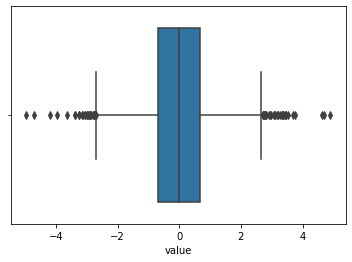

In [18]:
import seaborn as sns
sns.boxplot(data=df,x=df['value'])

In [21]:
from scipy import stats
z=np.abs(stats.zscore(df.value))
print(z)

0       1.030619
1       1.232586
2       0.517842
3       0.004905
4       1.424609
          ...   
4995    0.492064
4996    0.964981
4997    0.198162
4998    1.228364
4999    0.806573
Name: value, Length: 5000, dtype: float64


In [23]:
df[(df.value<df.value.mean()-3*df.value.std())|(df.value>df.value.mean()+3*df.value.std())].shape
# forma de fazer sem usar a biblioteca acima e calcular o Z.

(27, 1)

In [24]:
df[z>3].shape

(27, 1)

# Eliminando os outliers

In [26]:
df2=df[z<3]
df2.shape
# eliminando todos os outliers

(4973, 1)

# Cap Outliers

In [30]:
upperbound=df.value.mean()+3*df.value.std()
lowerbound=df.value.mean()-3*df.value.std()
df[df.value<lowerbound] =lowerbound #todo mundo que for menor que o lowerbound, substitui pelo lowerbound.
df[df.value>upperbound]=upperbound

In [31]:
df.describe()

,value
count,5000.000000
mean,0.006097
std,1.026503
min,-3.075016
25%,-0.675332
50%,0.002882
75%,0.675948
max,3.087286
